SPD                      105
CDU                      101
FDP                       76
AfD                       71
Bündnis 90/Die Grünen     63
Die Linke                 59
CSU                       24
Fraktionslos               3
AFD                        1
Name: party, dtype: int64
                       amount
SPD                       105
CDU                       101
FDP                        76
AfD                        72
Bündnis 90/Die Grünen      63
Die Linke                  59
CSU                        24
Fraktionslos                3


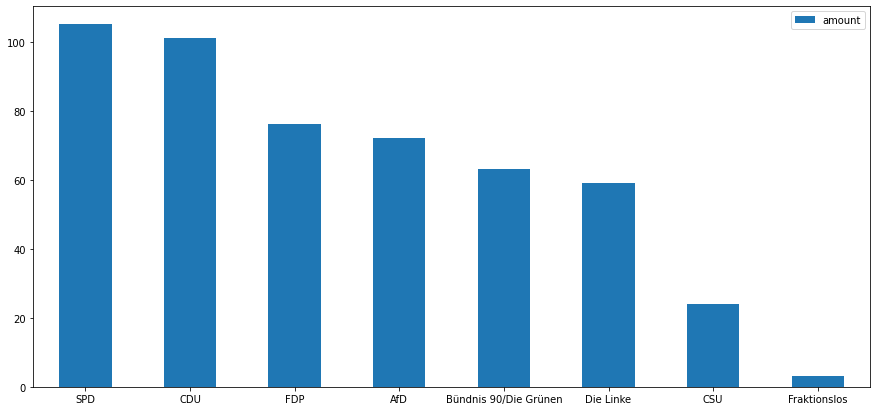

<Figure size 432x288 with 0 Axes>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

rawData = pd.read_csv(r"politicians_tweets_stats.csv")
newData = rawData[rawData.total_tweets_found != 0]
parties = newData.party
data = parties.value_counts()
print(data)
afd_amount = data.get('AfD') + data.get('AFD')
df = pd.DataFrame({'amount': newData.party.value_counts()})
df.replace(data.get('AfD'), afd_amount, inplace=True)
df.drop(index='AFD', inplace=True)
print(df)

df.plot.bar(rot=0, figsize=(15,7))
f = plt.figure()
f.savefig('politiciansPerParty.pdf', bbox_inches='tight')


party
SPD                      53928
FDP                      52173
CDU                      50554
Bündnis 90/Die Grünen    49377
Die Linke                45330
AfD                      29750
Fraktionslos              8330
CSU                       6146
Name: amount, dtype: int64
     amount                  party
0       299                    CDU
1      1011                    SPD
2       355  Bündnis 90/Die Grünen
4      1187                    CSU
5       936                    CDU
..      ...                    ...
550     351                    AFD
551    5141  Bündnis 90/Die Grünen
552   13199                    CDU
553    3243                    SPD
554    4253                    SPD

[503 rows x 2 columns]


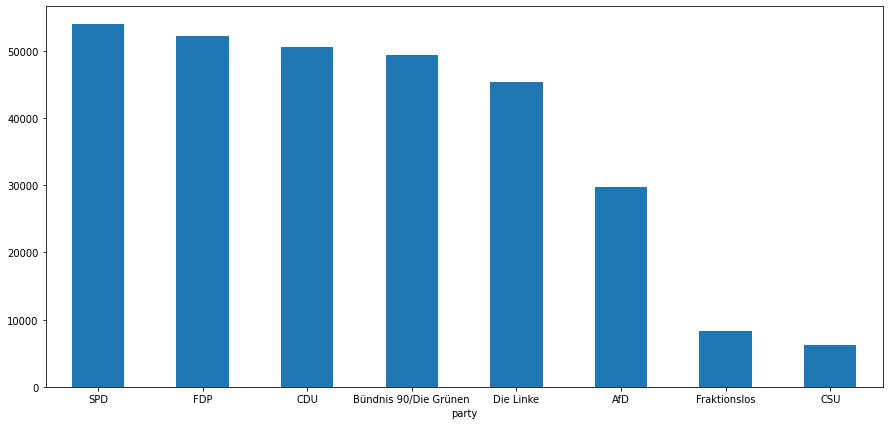

In [14]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

rawData = pd.read_csv(r"politicians_tweets_stats.csv")
newData = rawData[rawData.total_tweets_found != 0]
total_tweets = newData.total_tweets_found

newData.drop(columns=['name', 'screen_name', 'tweets_by_politician', 'ratio'], inplace=True)
df = pd.DataFrame({'amount': newData.total_tweets_found, 'party': newData.party})
df_grouped = df.groupby(['party'])['amount'].sum()
afd_amount = df_grouped.get('AfD') + df_grouped.get('AFD')
df_grouped.replace(df_grouped.get('AfD'), afd_amount, inplace=True)
df_grouped.drop(index='AFD', inplace=True)
df_grouped.sort_values(ascending=False, inplace=True)
print(df_grouped)
df_grouped.plot.bar(x = 'party', y='amount', rot=0, figsize=(15,7))
print(df)
